In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings

In [2]:
df = pd.read_csv('covid-variants.csv')
df.head()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


In [3]:


df['location'].value_counts()[:10]



Bangladesh        1080
Belgium           1080
United States     1080
United Kingdom    1080
France            1080
Mexico            1080
Netherlands       1080
Indonesia         1056
Argentina         1056
Italy             1056
Name: location, dtype: int64

In [4]:
df

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3
...,...,...,...,...,...,...
100411,Zimbabwe,2021-11-01,Omicron,0,0.0,6
100412,Zimbabwe,2021-11-01,S:677H.Robin1,0,0.0,6
100413,Zimbabwe,2021-11-01,S:677P.Pelican,0,0.0,6
100414,Zimbabwe,2021-11-01,others,0,0.0,6


In [5]:
df=df[df["variant"]!="non_who"]


In [6]:
#separate variants data
omicron=df[df["variant"]=="Omicron"]
delta=df[df["variant"]=="Delta"]
beta=df[df["variant"]=="Beta"]
others=df[(df["variant"]!="Delta") & (df["variant"]!="Omicron") & (df["variant"]!="Beta")]



In [7]:
#group by data with respect to date
omicron_world=omicron.groupby("date").sum()
omicron_world["date"]=omicron_world.index
delta_world=delta.groupby("date").sum()
delta_world["date"]=delta_world.index
beta_world=beta.groupby("date").sum()
beta_world["date"]=beta_world.index
others_world=others.groupby("date").sum()
others_world["date"]=others_world.index



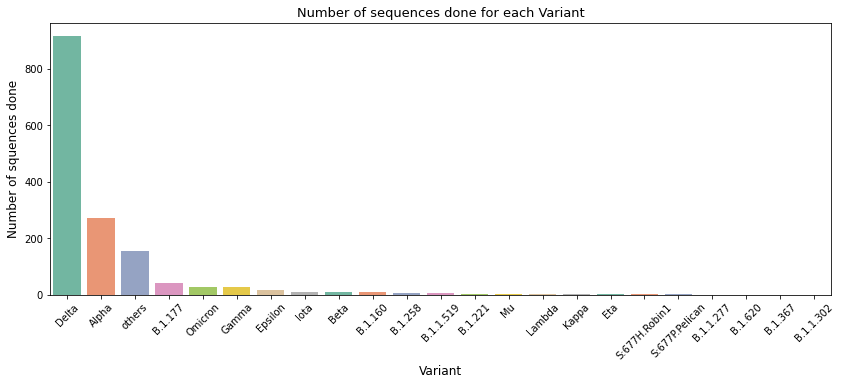

In [8]:
num_squences_by_variant_sorted = df.groupby('variant')['num_sequences'].sum().sort_values(ascending=False).index.values
plt.close(1);plt.figure(1, figsize=(14,5))
ax1 = sns.barplot(x="variant", y="num_sequences", data=df, order=num_squences_by_variant_sorted, ci=None, palette = 'Set2')
ax1.tick_params(axis='x', rotation=45)
ax1.set_title('Number of sequences done for each Variant', size=13)
ax1.set_xlabel('Variant', size= 12)
ax1.set_ylabel('Number of squences done', size= 12)
plt.show()

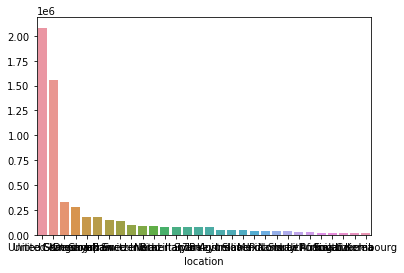

<Figure size 432x288 with 0 Axes>

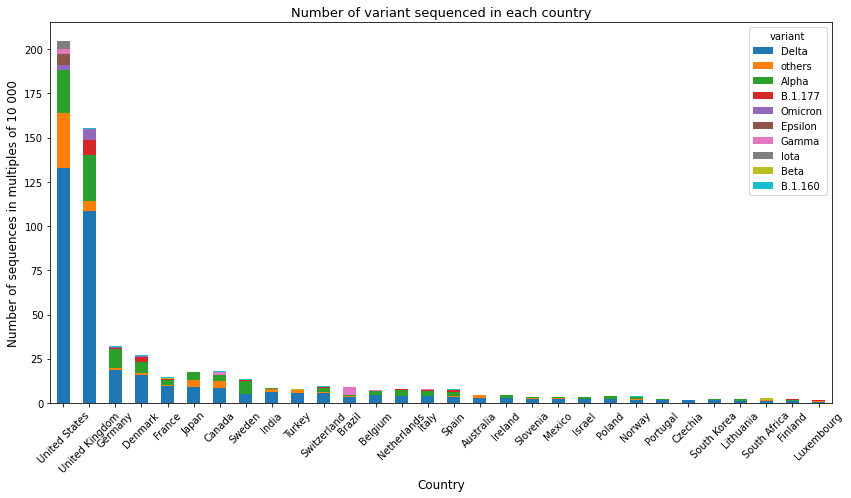

In [9]:

num_sequences_by_country_sorted = df.groupby('location')['num_sequences'].sum().sort_values(ascending=False)
seq_by_ctry_top30 = num_sequences_by_country_sorted[:30]
y_ticks = ticker.FuncFormatter(lambda y, pos: '{0:g}'.format(y/10000))
ax2 = sns.barplot(x=seq_by_ctry_top30.index, y=seq_by_ctry_top30.values)

# aggregate data into pivot table for stack col chart
variant_number_by_loc = pd.DataFrame(df.groupby(['location', 'variant'])['num_sequences'].sum().sort_values(ascending=False))

# Get list of top30 countries ordered by most number of sequences done
ax2_xlabels = ax2.get_xticklabels()
top30ctry_ordered = [ax2_xlabels[i].get_text() for i in range(len(ax2_xlabels))]

# Only use top 10 most sequenced variants
ax1_xlabels = ax1.get_xticklabels()
ax1_xlabels_strings = [ax1_xlabels[i].get_text() for i in range(len(ax1_xlabels))]
top10variants = ax1_xlabels_strings[:10]

# Filter pivot to keep top 30 countries by number of sequence done and top 10 most sequenced variants
variant_number_by_loc = variant_number_by_loc[variant_number_by_loc.index.get_level_values('location').isin(top30ctry_ordered)]
variant_number_by_loc = variant_number_by_loc[variant_number_by_loc.index.get_level_values('variant').isin(top10variants)].unstack()

# Drop top level of column indices
variant_number_by_loc.columns = variant_number_by_loc.columns.droplevel()

# Plot stacked bar chart
y_ticks = ticker.FuncFormatter(lambda y, pos: '{0:g}'.format(y/10000))

plt.close(3);plt.figure(3)
ax3 = variant_number_by_loc.plot.bar(stacked=True, figsize=[14,7], cmap='tab10')
ax3.yaxis.set_major_formatter(y_ticks)
ax3.tick_params(axis='x', rotation=45, labelsize=10)
ax3.set_xlabel('Country', size= 12)
ax3.set_ylabel('Number of sequences in multiples of 10 000', size= 12)
ax3.set_title('Number of variant sequenced in each country', size=13)
plt.show()

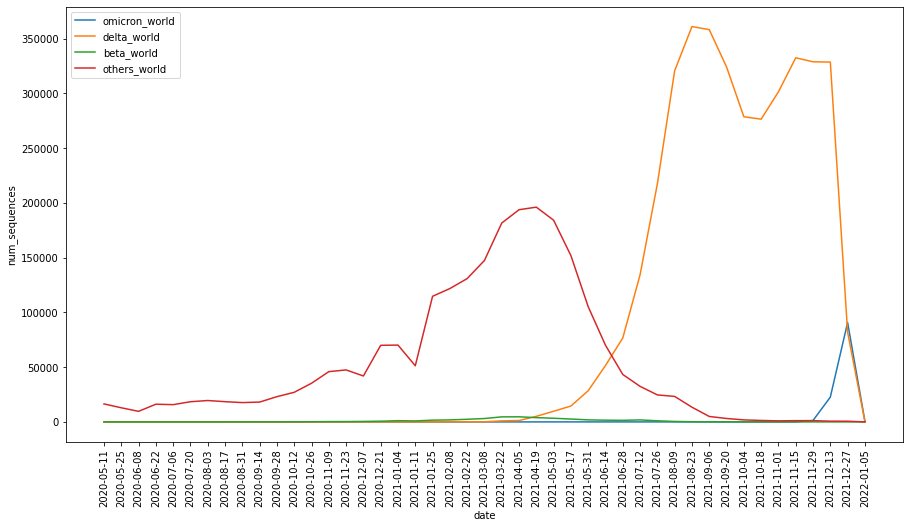

In [10]:


#plot cases of different variants in world 
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x=omicron_world['date'], y=omicron_world['num_sequences'],label="omicron_world")
sns.lineplot(x=delta_world['date'], y=delta_world['num_sequences'],label="delta_world")
sns.lineplot(x=beta_world['date'], y=beta_world['num_sequences'],label="beta_world")
sns.lineplot(x=others_world['date'], y=others_world['num_sequences'],label="others_world")
plt.show()



In [11]:
#separate variants data for india
omicron_Philippines=omicron[omicron['location']== "Philippines"]
delta_Philippines=delta[delta['location']== "Philippines"]
beta_Philippines=beta[beta['location']== "Philippines"]
others_Philippines=others[others['location']== "Philippines"]
others_group=others_Philippines.groupby("date").sum()
others_group["date"]=others_group.index

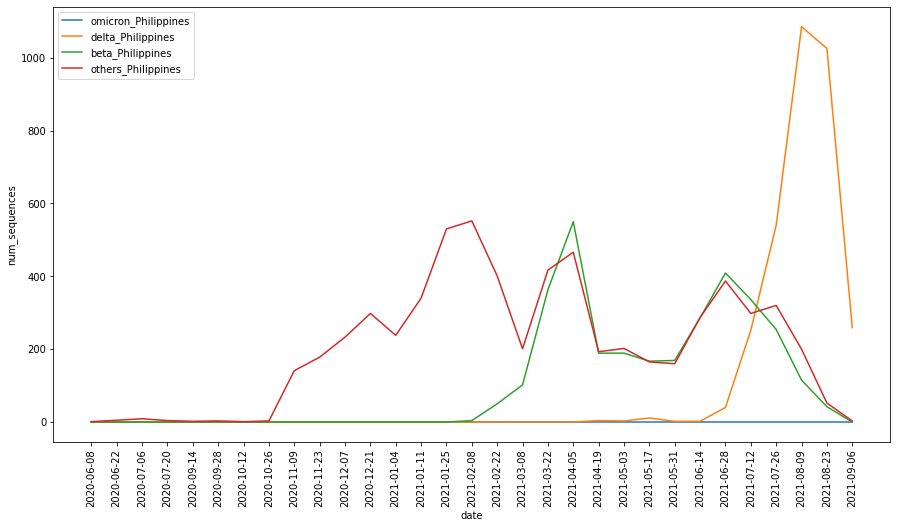

In [12]:
#plot cases of different variants in the Philippines
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x=omicron_Philippines['date'], y=omicron_Philippines['num_sequences'],label="omicron_Philippines")
sns.lineplot(x=delta_Philippines['date'], y=delta_Philippines['num_sequences'],label="delta_Philippines")
sns.lineplot(x=beta_Philippines['date'], y=beta_Philippines['num_sequences'],label="beta_Philippines")
sns.lineplot(x=others_group['date'], y=others_group['num_sequences'],label="others_Philippines")
plt.show()

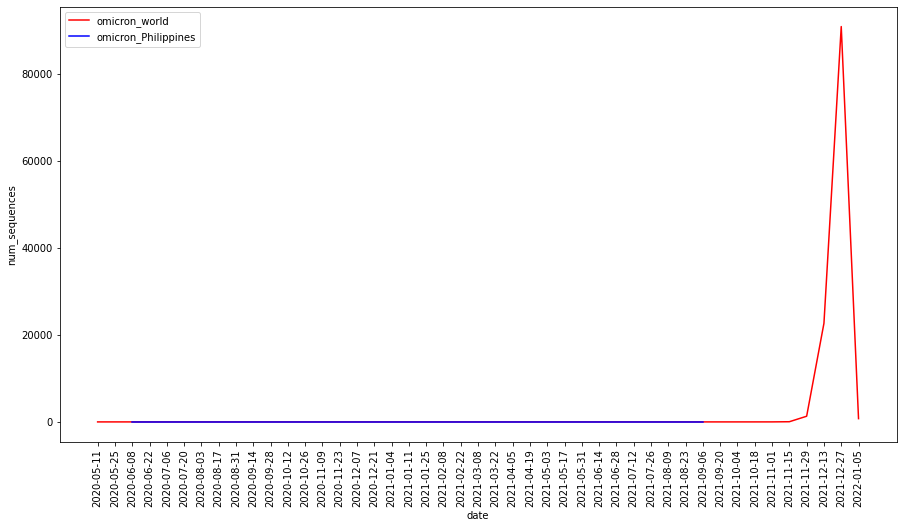

In [13]:

#Omicron PH vs World
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x=omicron_world['date'], y=omicron_world['num_sequences'],label="omicron_world",color ="red")
sns.lineplot(x=omicron_Philippines['date'], y=omicron_Philippines['num_sequences'],label="omicron_Philippines",color ="blue")
plt.show()



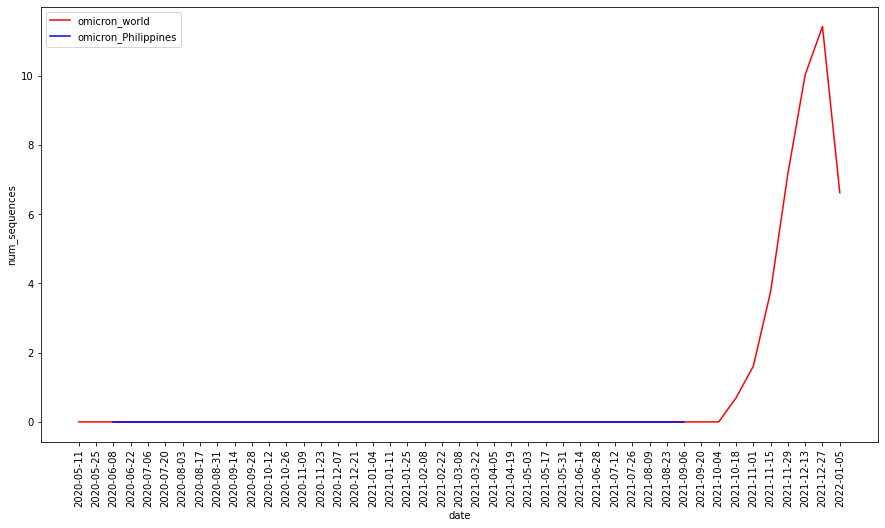

In [14]:


plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x=omicron_world['date'], y=np.log1p(omicron_world['num_sequences']),label="omicron_world", color ="red")
sns.lineplot(x=omicron_Philippines['date'], y=np.log1p(omicron_Philippines['num_sequences']),label="omicron_Philippines",color ="blue")
plt.show()



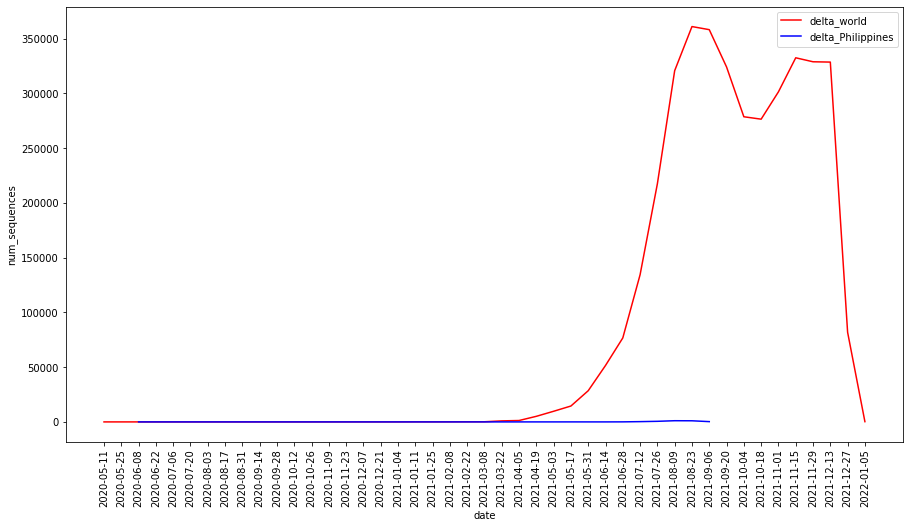

In [15]:
#delta ph vs world
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x=delta_world['date'], y=delta_world['num_sequences'],label="delta_world",color ="red")
sns.lineplot(x=delta_Philippines['date'], y=delta_Philippines['num_sequences'],label="delta_Philippines", color = 'blue')
plt.show()

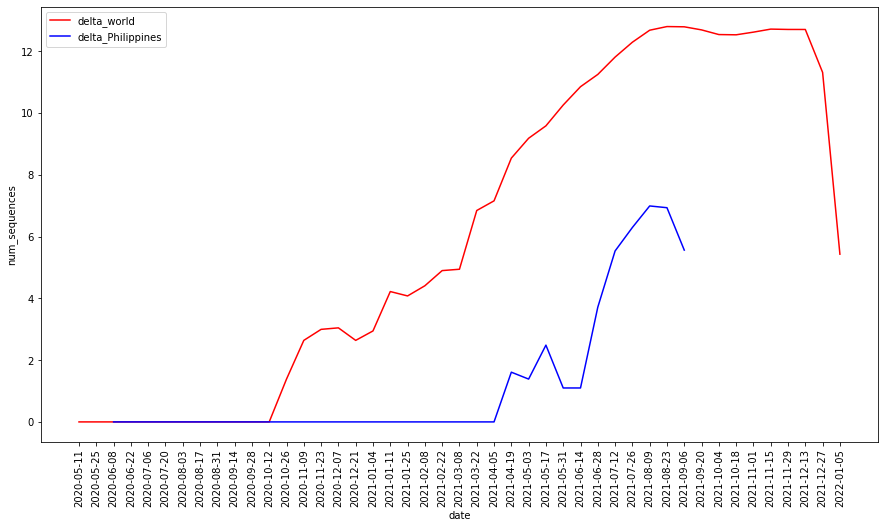

In [16]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x=delta_world['date'], y=np.log1p(delta_world['num_sequences']),label="delta_world", color ="red")
sns.lineplot(x=delta_Philippines['date'], y=np.log1p(delta_Philippines['num_sequences']),label="delta_Philippines", color = "blue")
plt.show()

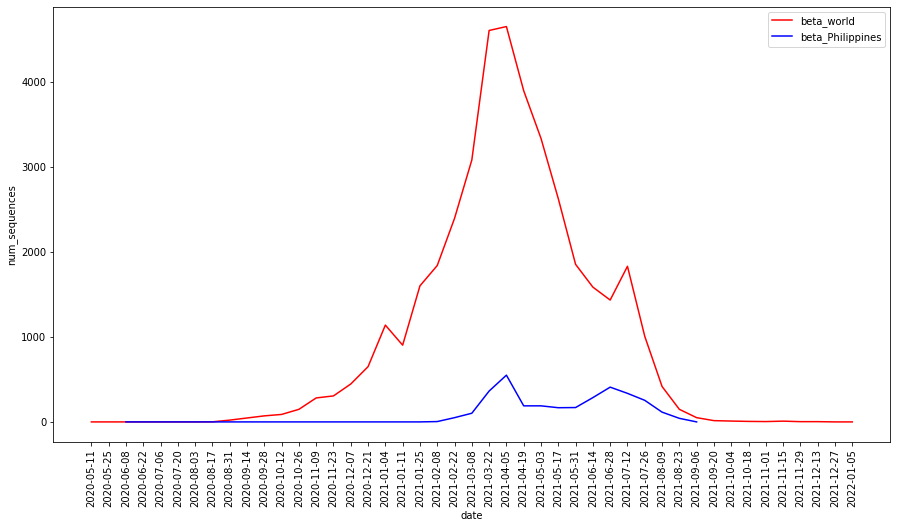

In [26]:
#beta ph vs world
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x=beta_world['date'], y=beta_world['num_sequences'],label="beta_world", color ="red")
sns.lineplot(x=beta_Philippines['date'], y=beta_Philippines['num_sequences'],label="beta_Philippines", color = "blue")
plt.show()

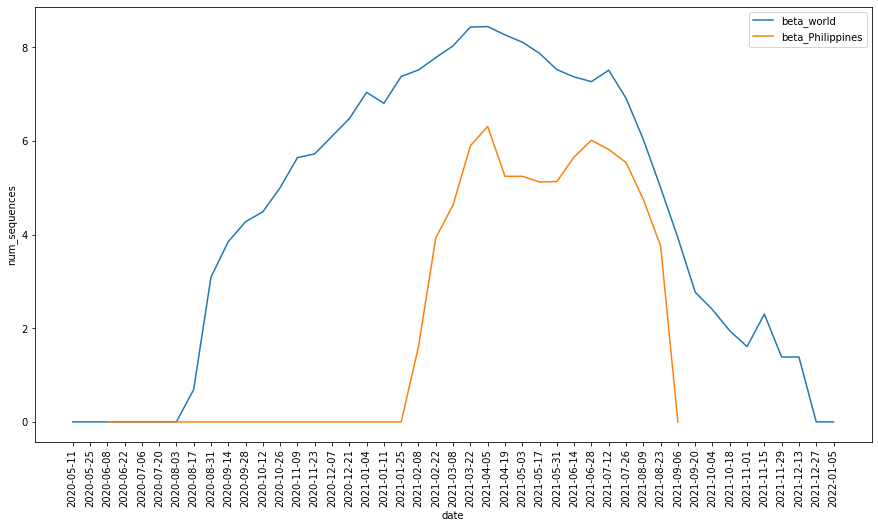